# The positive predictive value

## Some Definitions 

* $H_0$ : null hypothesis: The hypotheis that the effect we are testing for is null

* $H_A$ : alternative hypothesis : Not $H_0$, so there is some signal

* $T$ : The random variable that takes value "significant" or "not significant"

* $T_S$ : Value of T when test is significant (eg $T = T_S$)

* $T_N$ : Value of T when test is not significant (eg $T = T_N$)

* $\alpha$ : false positive rate - probability to reject $H_0$ when $H_0$ is true (therefore $H_A$ is false)

* $\beta$ : false negative rate - probability to accept $H_0$ when $H_A$ is true (i.e. $H_0$ is false)


power = $1-\beta$ 

where $\beta$ is the risk of *false negative*

So, to compute power, *we need to know what is the risk of false negative*, ie, the risk to not show a significant effect while we have some signal (null is false).

## Some standard python imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as sst
import matplotlib.pyplot as plt
from __future__ import division #python 2.x legacy

## A function to plot nicely some tables of probability

In [2]:
from sympy import symbols, Eq, solve, simplify, lambdify, init_printing, latex
init_printing(use_latex=True, order='old')
from sympy.abc import alpha, beta # get alpha, beta symbolic variables
from IPython.display import HTML
# Code to make HTML for a probability table
def association_table(assocs, title):
    latexed = {'title': title}
    for key, value in assocs.items():
        latexed[key] = latex(value)
    latexed['s_total'] = latex(assocs['t_s'] + assocs['f_s'])
    latexed['ns_total'] = latex(assocs['t_ns'] + assocs['f_ns'])
    return """<h3>{title}</h3>
              <TABLE><TR><TH>$H/T$<TH>$T_S$<TH>$T_N$
              <TR><TH>$H_A$<TD>${t_s}$<TD>${t_ns}$
              <TR><TH>$H_0$<TD>${f_s}$<TD>${f_ns}$
              <TR><TH>Total<TD>${s_total}$<TD>${ns_total}$
              </TABLE>""".format(**latexed)
assoc = dict(t_s = 1 - beta, # H_A true, test significant = true positives
             t_ns = beta, # true, not significant = false negatives
             f_s = alpha, # false, significant = false positives
             f_ns = 1 - alpha) # false, not sigificant = true negatives
HTML(association_table(assoc, 'Not considering prior'))

## Derivation of Ionannidis / Button positive prediction value : PPV

### Recall some important statistic concepts: Marginalization and Baye theorem

#### Marginalization

$\newcommand{Frac}[2]{\frac{\displaystyle #1}{\displaystyle #2}}$

We now consider that the hypotheses are *random events*, meaning that we can have a probability associated to these events. 

Let's define some new terms:

* $Pr(H_A)$ - prior probability of $H_A$ - probability of $H_A$ before the experiment was conducted.
* $Pr(H_0)$ - prior probability of $H_0$ = $1 - Pr(H_A)$ - probability of null hypothesis before experiment conducted

We are interested in updating the probability of $H_A$ and $H_0$ as a result of a test on some collected data.  This updated probability is $Pr(H_A | T)$ - the probability of $H_A$ given the test  result $T$. $Pr(H_A | T)$ is called the *posterior* probability because it is the probability after the test result.

The marginalization theorem is simply that 

$$ P(A) = \sum_{b_i} P(A,B=b_i) $$

To simplify the notation, we note $P(B=b)$ as $P(b)$

#### Baye theorem

Remembering [Bayes theorem](http://en.wikipedia.org/wiki/Bayes'_theorem#Derivation):

$$P(A, B) = P(A | B) P(B)$$

and therefore

$$P(A | B) = \Frac{P(B, A)}{P(B)} = \Frac{P(B | A) P(A)}{P(B)}$$


Putting these two together we have : 


$$P(A) = \sum_{b_i} P(A|B=b_i) P(B=b_i)$$

Now, apply this to the probability of the test results $T$. The test takes a value either under  $H_A$ or $H_0$.
The probability of a *signficant* result of the test $T=T_S$ is :

$Pr(T=T_S) = P(T_S) = Pr(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)$


What is the posterior probability of $H_A$ given that the test is significant?

$P(H_A | T_S) = \Frac{P(T_S | H_A) P(H_A)}{P(T_S)} = \Frac{P(T_S | H_A) P(H_A)}{P(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)}$

We have $P(T_S | H_A)$, $P(T_S | H_0)$ from the first column of the table above. Substituting into the equation:

$P(H_A | T_S) = \Frac{(1 - \beta) P(H_A)}{(1 - \beta) P(H_A) + \alpha P(H_0)}$

Defining:

$\pi := Pr(H_A)$, hence: $1 - \pi = Pr(H_0)$

we have:

$P(H_A | T_S) = \Frac{(1 - \beta) \pi}{(1 - \beta) \pi + \alpha (1 - \pi)}$


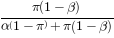

In [3]:
from sympy.abc import pi # get symbolic variable pi
post_prob = (1 - beta) * pi / ((1 - beta) * pi + alpha * (1 - pi))
post_prob

In [4]:
assoc = dict(t_s = pi * (1 - beta),
             t_ns = pi * beta,
             f_s = (1 - pi) * alpha,
             f_ns = (1 - pi) * (1 - alpha))
HTML(association_table(assoc, r'Considering prior $\pi := P(H_A)$'))

## From Button et al. : three messages

### Message 1 : _studies of low power have low probability of detecting an effect_

#### From the definition of power !

### Message 2 :  _studies of low power have low positive predictive value : PPV = P(H1 True | detection)_

Same as Ioannidis - do the derivation starting with odd ratios 

From Button et al., we have the positive predictive value PPV defined as :

$$
PPV = \frac{(1-\beta)R}{(1-\beta)R + \alpha},\textrm{ with } R = P(H_1)/P(H_0) = P_1/P_0 = \pi / (1-\pi)
$$

Hence, 

$$
PPV = \frac{(1-\beta)P_1}{P_0}\frac{P_0}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= \frac{(1-\beta)P_1}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= P(H_1, T_S) / P(T_S) = P(H_1 | T_S) 
$$

If we have 4 chances over 5 that $H_0$ is true, and one over five that $H_1$ true, then R = 1/5 / 4/5 = .25. If there's 30% power we have PPV = 50%. So, 50% chance that our result is indeed true. 80% power leads to 80% chance of $H_1$ to be true, knowing that we have detected an effect at the $\alpha$ risk of error. 

In [53]:
def PPV_OR(odd_ratio, power, alpha, verbose=True):
    """
    returns PPV from odd_ratio, power and alpha
    
    parameters:
    -----------
    odd_ratio: float
        P(H_A)/(1-P(H_A))
    power: float
        Power for this study
    alpha: float
        type I risk of error
        
    Returns:
    ----------
    float
        The positive predicted value
    
    """
    
    ppv = (power*odd_ratio)/(power*odd_ratio + alpha)
    if verbose:
        print("With odd ratio=%3.2f, "
               "Power=%3.2f, alpha=%3.2f, "
               "We have PPV=%3.2f" %(odd_ratio,power,alpha,ppv))
    return ppv
    

In [54]:
def plot_ppv(xvalues, yvalues, xlabel, ylabel, title):
    '''
    '''
    fig = plt.figure();
    axis = fig.add_subplot(1, 1, 1)
    axis.plot(xvalues, yvalues, color='red', marker='o', linestyle='dashed',
            linewidth=2, markersize=14);
    axis.set_xlabel(xlabel,fontsize=20);
    axis.set_ylabel(ylabel,fontsize=20);
    axis.set_title(figure_title, fontsize=20);
    return fig, axis

### Example from Button et al, 2013

In [55]:
# example from Button et al: P1 = 1/5, P0 = 4/5. R = 1/4
R = 1./5.
Pw = .5
alph = .01
ppv = PPV_OR(R, Pw, alph)

With odd ratio=0.20, Power=0.50, alpha=0.01, We have PPV=0.91


### Vary power

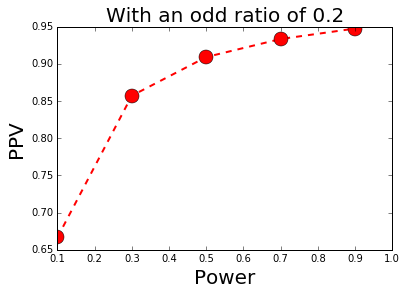

In [56]:
# Vary power:
Pw = np.arange(.1,1,.2)
ppvs = [PPV_OR(R, pw, alph, verbose = False) for pw in Pw]
xlabel = 'Power'
ylabel = 'PPV'
figure_title = 'With an odd ratio of {odd_ratio}'.format(odd_ratio=R)

plot_ppv(Pw, ppvs, xlabel, ylabel, figure_title);


### Vary odd ratio

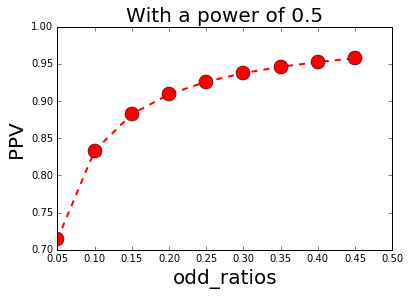

In [57]:
# Vary odd ratio:
Pw = .5
odd_ratios = np.arange(.05,.5,.05)
ppvs = [PPV_OR(R, Pw, alph, verbose = False) for R in odd_ratios]
xlabel = 'odd_ratios'
ylabel = 'PPV'
figure_title = 'With a power of {power}'.format(power=Pw)

assert len(odd_ratios) == len(ppvs)

plot_ppv(odd_ratios, ppvs, xlabel, ylabel, figure_title);


### Vary alpha

In [59]:
R = 1./5.
Pw = .5
alphas = [0.001, .005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
ppvs = [PPV_OR(R, Pw, alph) for alph in alphas]

With odd ratio=0.20, Power=0.50, alpha=0.00, We have PPV=0.99
With odd ratio=0.20, Power=0.50, alpha=0.01, We have PPV=0.95
With odd ratio=0.20, Power=0.50, alpha=0.01, We have PPV=0.91
With odd ratio=0.20, Power=0.50, alpha=0.05, We have PPV=0.67
With odd ratio=0.20, Power=0.50, alpha=0.10, We have PPV=0.50
With odd ratio=0.20, Power=0.50, alpha=0.20, We have PPV=0.33
With odd ratio=0.20, Power=0.50, alpha=0.30, We have PPV=0.25
With odd ratio=0.20, Power=0.50, alpha=0.40, We have PPV=0.20
With odd ratio=0.20, Power=0.50, alpha=0.50, We have PPV=0.17


With odd ratio=0.20, Power=0.50, alpha=0.01, We have PPV=0.91
0.9090909090909092


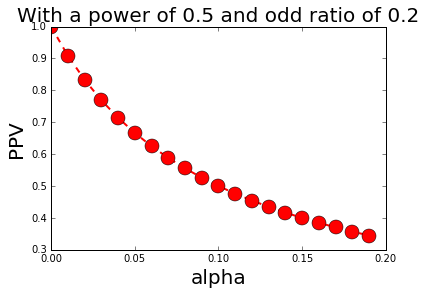

In [73]:
# Vary alpha:
Pw = .5
R = 1/5
alphas = np.arange(0, .2, 0.01)# [0.001, .005, 0.01, 0.05, 0.1] #, 0.2, 0.3, 0.4, 0.5]
ppvs = [PPV_OR(R, Pw, alph, verbose = False) for alph in alphas]

# print
xlabel = 'alpha'
ylabel = 'PPV'
figure_title = 'With a power of {power} and odd ratio of {odd_ratio}'.format(
                                        power=Pw, odd_ratio=R)
plot_ppv(alphas, ppvs, xlabel, ylabel, figure_title);


# End of the PPV section